## Final Project Submission

Please fill out:
* Student name: Terry Thompson
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Matt Carr
* Blog post URL:https://www.blogger.com/blog/post/edit/394033909374120085/5566861248363402941


# <div align="center"><b> King County Housing Data </b></div>

#### I will be looking at ways for homeowners to increase their property value in King County, Washington.  Below we will look at the King County Washington housing dataset to build a model that will ascertain which aspects of property improvement would be the best choices for homeowners.  

In [1]:
# Import necessary tools, take a look at the data.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
import numpy as np
import pandas as pd
pd.read_csv('kc_house_data.csv')
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
#check dataset shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Check for NaNs
for column in df.columns:
    num_of_nan = (sum(df[column].isnull()) / len(df[column])) * 100
    print(column, num_of_nan)

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
view 0.29170718155299347
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 17.78950780200954
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


###### The waterfront and view columns need to be filled.  The yr_renovated column will be dropped.  

In [4]:
df.waterfront.fillna(0.0, inplace=True)
df.view.fillna(0.0, inplace=True)

In [5]:
df.waterfront.value_counts()

NO     19075
0.0     2376
YES      146
Name: waterfront, dtype: int64

In [6]:
df['waterfront'] = df['waterfront'].replace(['NO', 0.0, 'YES'], [0, 0, 1])

In [7]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
0.0             63
Name: view, dtype: int64

In [8]:
df['view'] = df['view'].replace(['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT', 0.0], [0, 1, 2, 3, 4, 0])

In [9]:
df.view.value_counts()

0    19485
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

###### The basement column will need to be cleaned.

In [12]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
946.0         1
475.0         1
2730.0        1
2580.0        1
1880.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [13]:
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0).astype('float')
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

###### The condition and grade columns have non numeric values, and will need to be cleaned.

In [14]:
df['condition'] = df['condition'].replace(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], ['1', '2', '3', '4', '5']).astype('int64')
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [15]:
df['grade'] = df['grade'].replace(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
                                   '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'],
                                  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']).astype('int64')
df.grade.value_counts()

5     8974
6     6065
7     2615
4     2038
8     1134
9      399
3      242
10      89
2       27
11      13
1        1
Name: grade, dtype: int64

In [16]:
df.floors = np.ceil(df.floors).astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  int64  
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


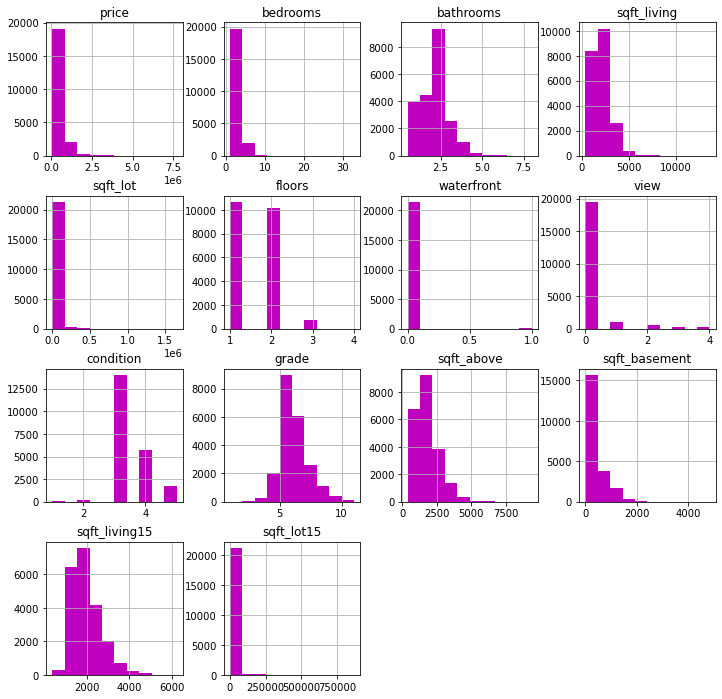

In [18]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax, color = 'm');

###### We will now check for relationship between the features and price.  This will give us an idea as to what has a clear relationship, as well as features we may need to assess further.

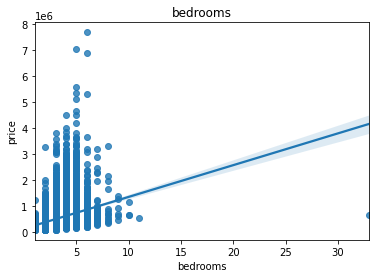

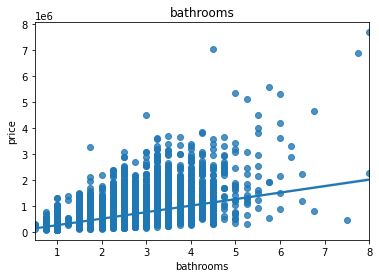

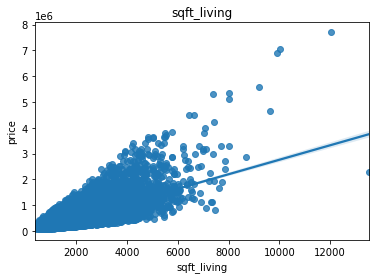

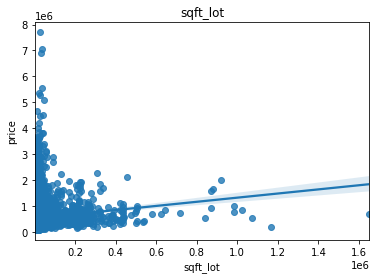

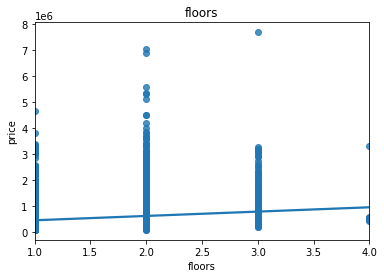

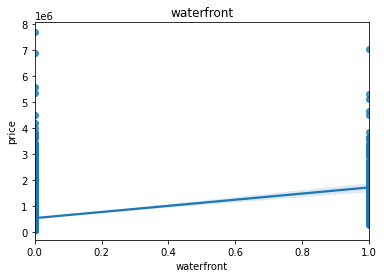

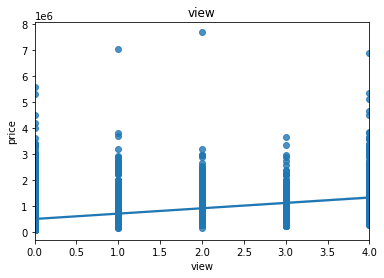

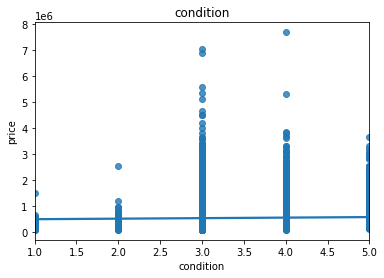

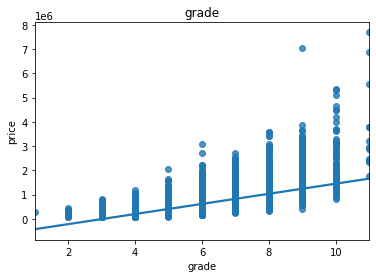

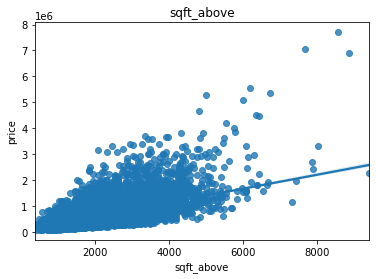

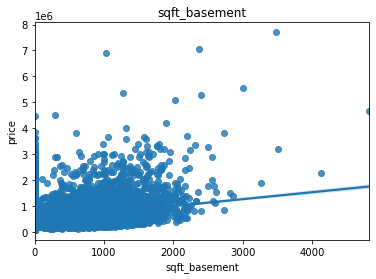

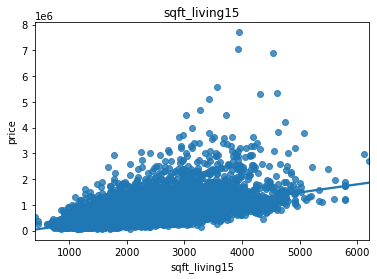

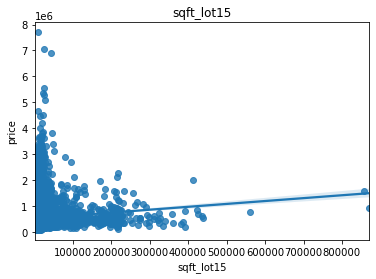

In [19]:
X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.subplots(1, 1)
    sns.regplot(X[col], df.price)
    plt.title(col)

###### We will now check for multicollinearity using a heatmap.

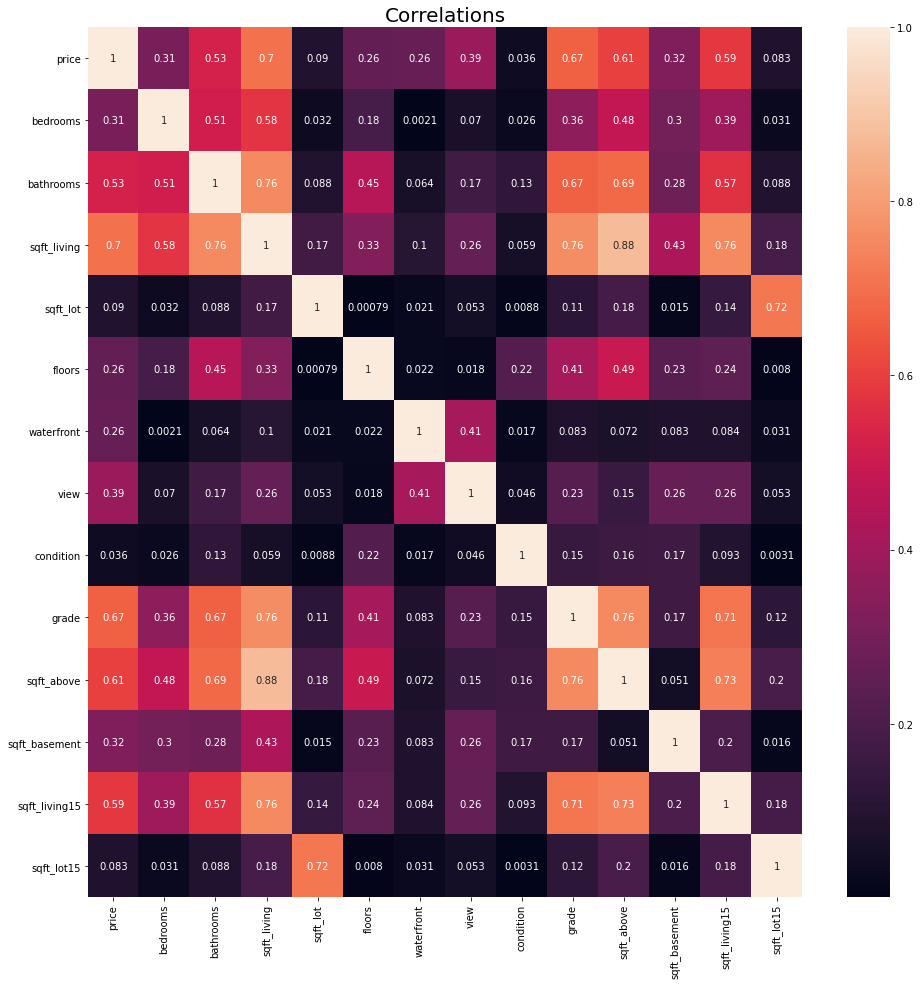

In [20]:
corr = df.corr().abs()
fig, ax = plt.subplots(figsize = (16,16))
plt.title('Correlations', fontsize = 20, y = 1)
heatmap = sns.heatmap(corr, annot = True)
heatmap;

In [21]:
features = []
correlations = []
for idx, correlation in corr['price'].iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(['Correlations'],
                                                                                              ascending = False)

In [22]:
multico_features = []
multico_corr = []
def check_multico(feature):
    for idx, correlation in corr[feature].iteritems():
        if correlation >= .80 and idx != feature:
            multico_features.append([feature, idx])
            multico_corr.append(correlation)

print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
2,0.701917,sqft_living
4,0.667951,grade
5,0.605368,sqft_above
7,0.585241,sqft_living15
1,0.525906,bathrooms
3,0.386430,view
6,0.321108,sqft_basement
0,0.308787,bedrooms


In [23]:
for feature in corr:
    check_multico(feature)
multi_df = pd.DataFrame({'Correlations':multico_corr, 'Features': multico_features}).sort_values(['Correlations'],
                                                                                                 ascending = False)
print('Multicollinear Features')
display(multi_df)

Multicollinear Features


,Correlations,Features
0,0.876448,"[sqft_living, sqft_above]"
1,0.876448,"[sqft_above, sqft_living]"


In [24]:
df.drop(['sqft_above'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1,0,0,3,5,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2,0,0,3,5,400.0,1690,7639
2,180000.0,2,1.00,770,10000,1,0,0,3,4,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1,0,0,5,5,910.0,1360,5000
4,510000.0,3,2.00,1680,8080,1,0,0,3,6,0.0,1800,7503


###### Now that the data is cleaned, we will begin testing.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
def test_model(dataframe):
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    model

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    print('Coefficients:', model.coef_)

    X_train = sm.add_constant(X_train)
    sqmodel = sm.OLS(y_train, X_train).fit()
    print(sqmodel.summary())
    return sqmodel

In [27]:
test1 = test_model(df)
test1

Training Score: 0.6
Test Score: 0.63
Coefficients: [-3.76035438e+04 -2.15358978e+04  1.75793067e+02  5.54169642e-02
  2.61352872e+04  5.42206520e+05  7.18717320e+04  5.66970779e+04
  9.88998950e+04  4.97177991e+01  1.75361454e+01 -7.30856617e-01]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2179.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:32:43   Log-Likelihood:            -2.3768e+05
No. Observations:               17277   AIC:                         4.754e+05
Df Residuals:                   17264   BIC:                         4.755e+05
Df Model:                          12                                         
Covariance Type:            nonrobust     

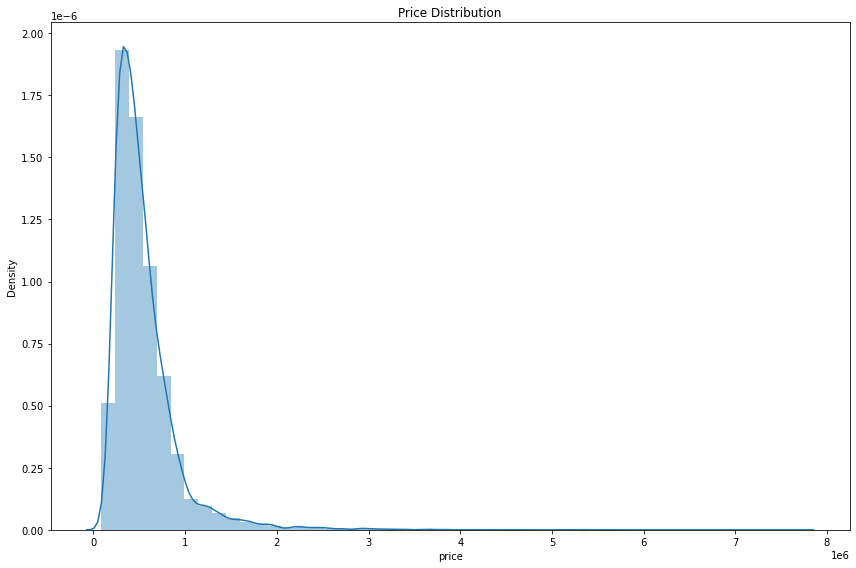

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

###### Here we see that the price variable is skewed.  We will have to check for outliers.

In [29]:
df = df[df['price'] <= 1000000]

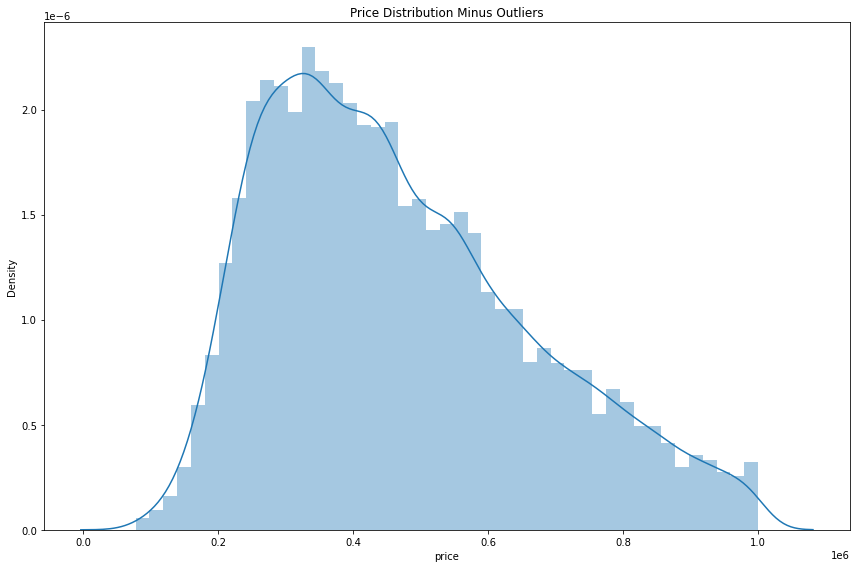

In [30]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution Minus Outliers')
plt.tight_layout()

###### After removing the outliers, our curve is better.  We will use this going forward.

In [31]:
test2 = test_model(df)
test2

Training Score: 0.49
Test Score: 0.5
Coefficients: [-8.32668231e+03 -2.31002140e+04  5.98025769e+01  1.98905486e-01
  4.40854186e+04  7.95593756e+04  3.22398385e+04  4.00231225e+04
  7.28509015e+04  5.80835177e+01  5.00221909e+01 -3.92008723e-01]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     1283.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:32:45   Log-Likelihood:            -2.1377e+05
No. Observations:               16111   AIC:                         4.276e+05
Df Residuals:                   16098   BIC:                         4.277e+05
Df Model:                          12                                         
Covariance Type:            nonrobust     

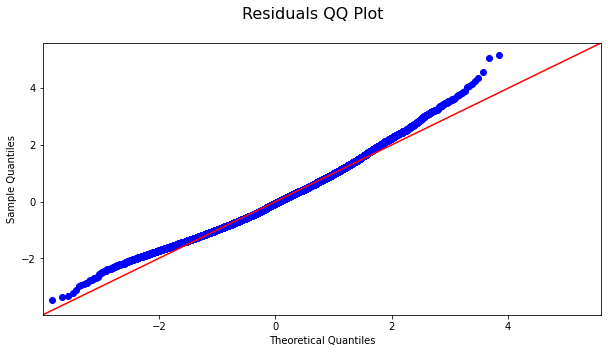

In [32]:
residuals = test2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

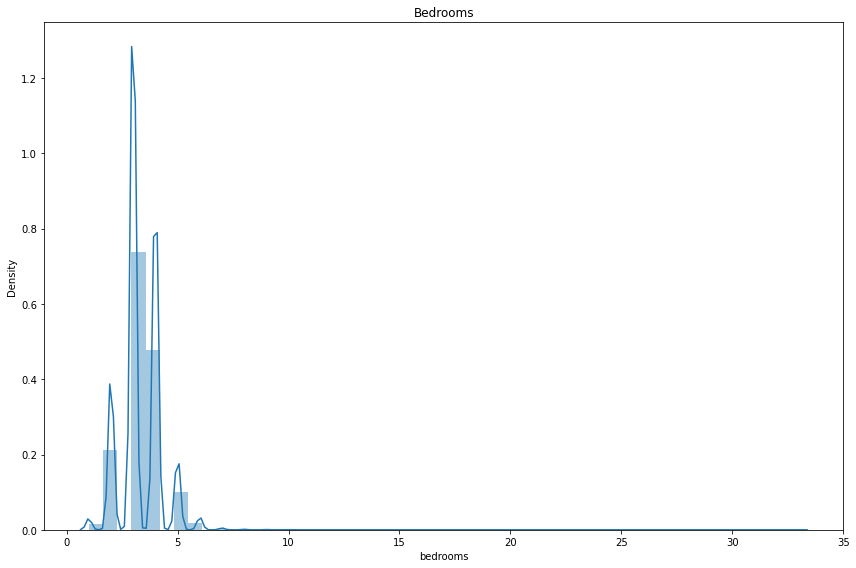

In [33]:
plt.figure(figsize=(12, 8))
sns.distplot(df.bedrooms)
plt.title('Bedrooms')
plt.tight_layout()

In [34]:
df[df['bedrooms'] > 8]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15
4092,599999.0,9,4.50,3830,6988,3,0,0,3,5,1380.0,1460,6291
4231,700000.0,9,3.00,3680,4400,2,0,0,3,5,850.0,1960,2450
8537,450000.0,9,7.50,4050,6504,2,0,0,3,5,0.0,1448,3866
8748,520000.0,11,3.00,3000,4960,2,0,0,3,5,600.0,1420,4960
15147,650000.0,10,2.00,3610,11914,2,0,0,4,5,600.0,2040,11914
15856,640000.0,33,1.75,1620,6000,1,0,0,5,5,580.0,1330,4700
18428,934000.0,9,3.00,2820,4480,2,0,0,3,5,940.0,2460,4400
19239,660000.0,10,3.00,2920,3745,2,0,0,4,5,1060.0,1810,3745


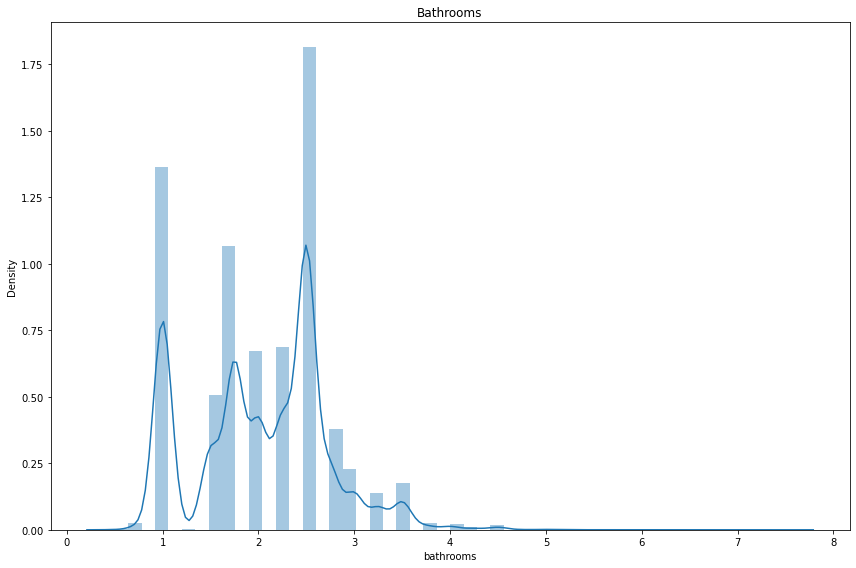

In [35]:
plt.figure(figsize=(12, 8))
sns.distplot(df.bathrooms)
plt.title('Bathrooms')
plt.tight_layout()

In [36]:
df[df['bathrooms'] > 5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15
4020,800000.0,7,6.75,7480,41664,2,0,1,3,9,2400.0,2810,33190
4594,643500.0,6,5.25,3600,3960,2,0,0,3,5,1200.0,1450,4600
8537,450000.0,9,7.50,4050,6504,2,0,0,3,5,0.0,1448,3866
13894,925000.0,5,5.50,5190,12637,2,0,1,3,9,0.0,3840,12637
15737,540000.0,7,5.75,3700,7647,2,0,3,3,6,0.0,2510,7479
16789,300000.0,6,5.25,2860,5682,2,0,0,3,5,0.0,1390,5956
21034,900000.0,5,6.00,7120,40806,2,0,4,3,10,1640.0,3440,36859


###### We see that bedrooms and bathrooms have some outliers we will need to trim.

In [37]:
df = df[df['bedrooms'] <= 8]
df = df[df['bathrooms'] <= 5]

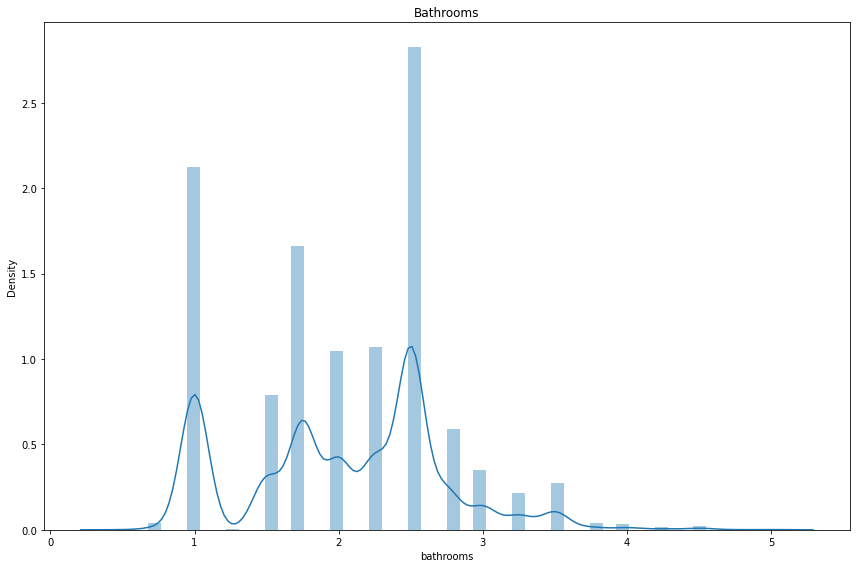

In [38]:
plt.figure(figsize=(12, 8))
sns.distplot(df.bathrooms)
plt.title('Bathrooms')
plt.tight_layout()

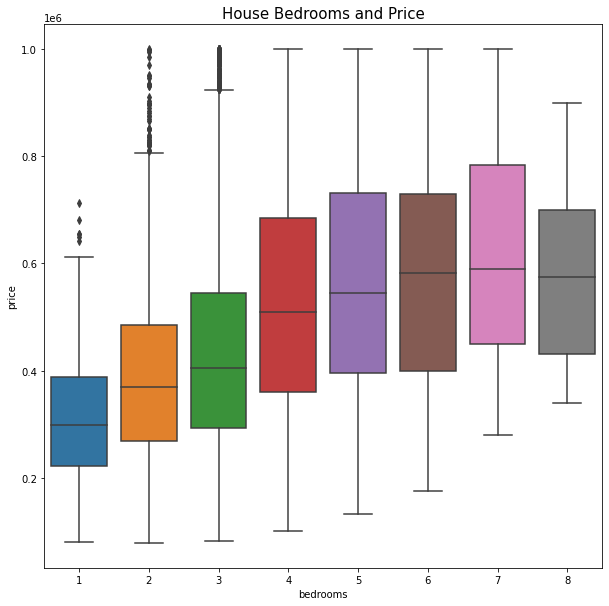

In [39]:
plt.figure(figsize = (10,10))
sns.boxplot(df['bedrooms'], df['price'])
plt.title('House Bedrooms and Price', fontsize = 15);

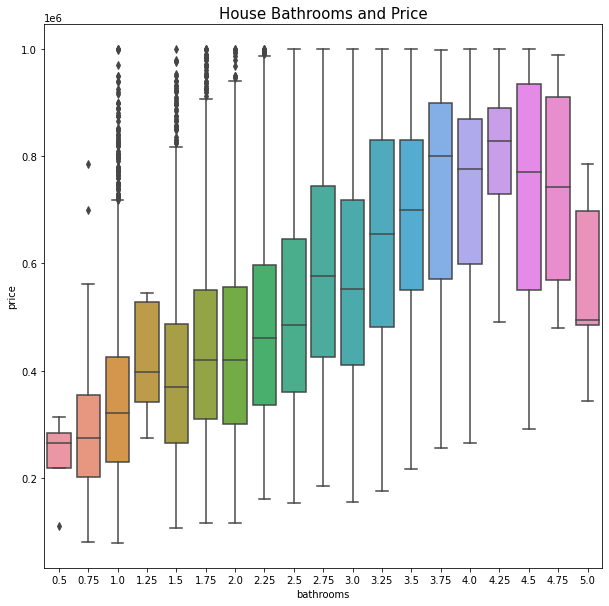

In [40]:
plt.figure(figsize = (10,10))
sns.boxplot(df['bathrooms'], df['price'])
plt.title('House Bathrooms and Price', fontsize = 15);

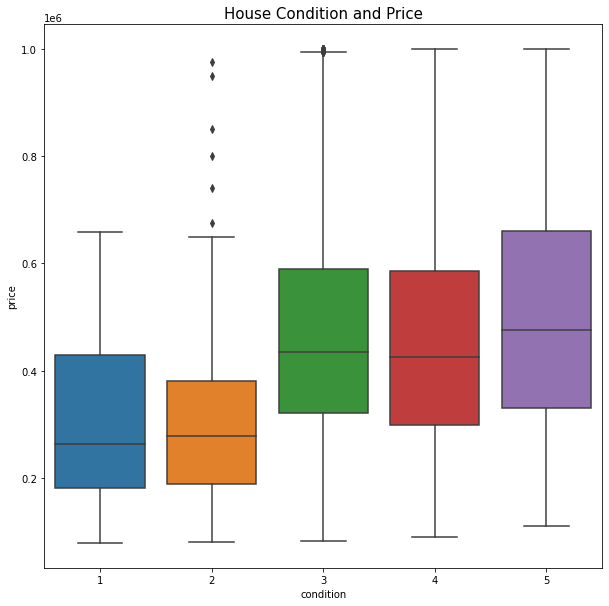

In [41]:
plt.figure(figsize = (10,10))
sns.boxplot(df['condition'], df['price'])
plt.title('House Condition and Price', fontsize = 15);

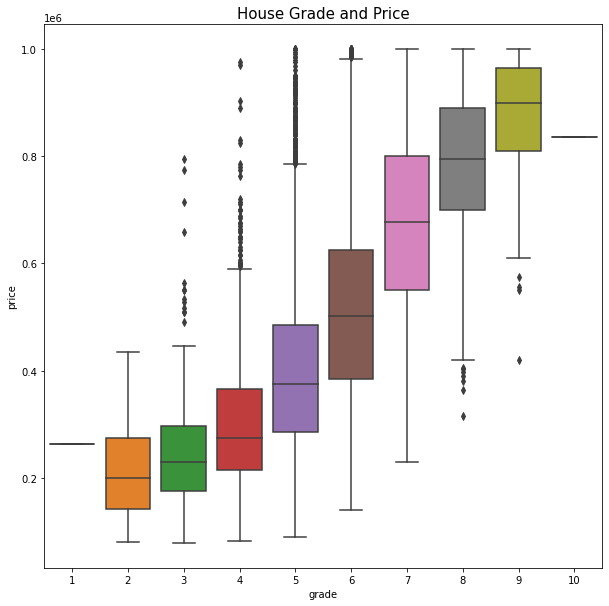

In [42]:
plt.figure(figsize = (10,10))
sns.boxplot(df['grade'], df['price'])
plt.title('House Grade and Price', fontsize = 15);

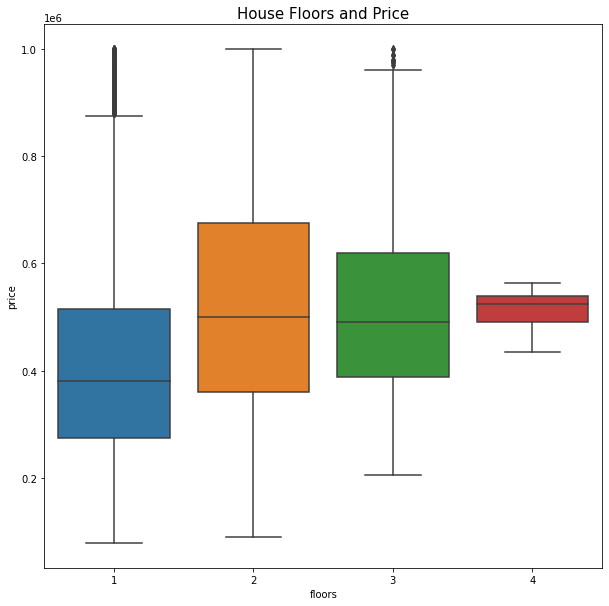

In [43]:
plt.figure(figsize = (10,10))
sns.boxplot(df['floors'], df['price'])
plt.title('House Floors and Price', fontsize = 15);

In [44]:
test3 = test_model(df)
test3

Training Score: 0.49
Test Score: 0.49
Coefficients: [-1.14766791e+04 -2.14925184e+04  6.25754261e+01  1.77432060e-01
  4.48899055e+04  8.74110232e+04  3.29521720e+04  3.95997606e+04
  7.23551579e+04  5.91994669e+01  4.85756100e+01 -3.98660510e-01]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1310.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:32:51   Log-Likelihood:            -2.1361e+05
No. Observations:               16100   AIC:                         4.272e+05
Df Residuals:                   16087   BIC:                         4.273e+05
Df Model:                          12                                         
Covariance Type:            nonrobust    

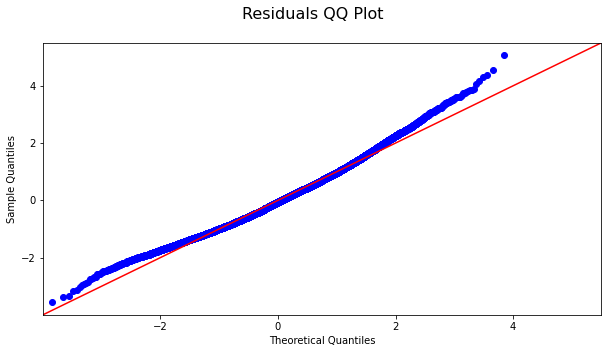

In [45]:
residuals = test3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

###### We will drop basements and floors from the data.

In [46]:
df.drop(['sqft_basement', 'floors'], axis=1, inplace=True)

In [47]:
test4 = test_model(df)
test4

Training Score: 0.48
Test Score: 0.47
Coefficients: [-1.19096940e+04 -8.70987605e+03  8.35870385e+01  1.54058728e-01
  8.20534732e+04  3.70753609e+04  3.91669591e+04  7.33189375e+04
  3.49653769e+01 -4.55158736e-01]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1492.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:32:51   Log-Likelihood:            -2.1381e+05
No. Observations:               16100   AIC:                         4.276e+05
Df Residuals:                   16089   BIC:                         4.277e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                    

In [48]:
X = df.drop(columns=['price'], axis=1)
y = df.price

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1000)

#Fit the model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
model

#View model accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print('Training Score:', round(train_score, 2))
print('Test Score:', round(test_score, 2))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

#View model summary in statsmodels
X_train = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, X_train).fit()
smmodel.summary()

Training Score: 0.48
Test Score: 0.47
Intercept: -242852.0925727476
Coefficients: [-1.19096940e+04 -8.70987605e+03  8.35870385e+01  1.54058728e-01
  8.20534732e+04  3.70753609e+04  3.91669591e+04  7.33189375e+04
  3.49653769e+01 -4.55158736e-01]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1492.
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:32:51   Log-Likelihood:            -2.1381e+05
No. Observations:               16100   AIC:                         4.276e+05
Df Residuals:                   16089   BIC:                         4.277e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.429e+05   1.04e+04    -23.430      0.000   -2.63e+05   -2.23e+05
bedrooms      -1.191e+04   1671.563     -7.125      0.000   -1.52e+04   -8633.244
bathrooms     -8709.8760   2394.853     -3.637      0.000   -1.34e+04   -4015.697
sqft_living      83.5870      3.034     27.549      0.000      77.640      89.534
sqft_lot          0.1541      0.038      4.010      0.000       0.079       0.229
waterfront     8.205e+04   2.37e+04      3.463      0.001    3.56e+04    1.28e+05
view           3.708e+04   2194.992     16.891      0.000    3.28e+04    4.14e+04
condition      3.917e+04   1774.128     22.077      0.000    3.57e+04    4.26e+04
grade          7.332e+04   1696.312     43.223      0.000       7e+04    7.66e+04
sqft_living15    34.9654      2.917     11.986      0.000      29.247      40.683
sqft_lot15       -0.4552      0.061     -7.476      0.000      -0.575      -0.336
==============================================================================
Omnibus:                      523.610   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.939
Skew:                           0.449   Prob(JB):                    5.24e-126
Kurtosis:                       3.234   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model_coefficients = pd.DataFrame(smmodel.params[1:], columns=['coefficients'])

In [50]:
print("Final Regression Formula\n")
print(model.intercept_, '+')
print('sum(')
for i in range(len(model_coefficients)):
    print(model_coefficients.coefficients[i], '*', model_coefficients.index[i])
print(')')

Final Regression Formula

-242852.0925727476 +
sum(
-11909.693984160132 * bedrooms
-8709.876047462734 * bathrooms
83.58703854070781 * sqft_living
0.15405872765151515 * sqft_lot
82053.47323192639 * waterfront
37075.36087664019 * view
39166.95910001932 * condition
73318.93746608976 * grade
34.96537688367062 * sqft_living15
-0.4551587359415632 * sqft_lot15
)


###### With the final regression, we can see that upgrading one unit in grade will raise the value of the home by $71,685.   

###### Upgrading the condition of the house by one unit will raise the value by $38,623.

###### Upgrading the square footage of the house by one unit will raise the value of the house by 83 dollars.  If the square footage were increase 100 square feet, the value would rise 8,341 dollars.

###### In conclusion, upgrading the grade, condition, or square footage of the house will yield the best raises in property value.  This model does have limitations though, as it does not take into account mega mansions, or multifamily housing.  Other tests should be run to ascertain the best upgrades for said housing.

######  Other factors that could be further researched would be proximity to amenities, crime rate per zipcode, and infrastructure by zipcode.